In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [12]:

medical_df = pd.read_csv('medical-charges.csv')

medical_df.head(100)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
95,28,female,37.620,1,no,southeast,3766.88380
96,54,female,30.800,3,no,southwest,12105.32000
97,55,male,38.280,0,no,southeast,10226.28420
98,56,male,19.950,0,yes,northeast,22412.64850


Дивлячись на дані, а точніше на колонки з даними я бачу декілька параметрів, які можуть потенційно впливати на показник charges.

1) Перше, що приходить в голову - це BMI. Чим вище вага людини, тим більше вона може мати проблем зі здоровʼям. Тобто зі збільшенням BMI повинні рости.
2) Також вік може грати важливу роль у виплатах. З віком людина починає більше хворіти, а значить і більше використовувати медичну страховку.
3) Чи є людина курцем чи ні теж важливо на мою думку. Курці мають більше проблем ніж не курці. А значить і більше виплат по медичній страховці.
4) Щодо кількості дітей. Ми не знаємо чи є у компанії виплати мед страхування дітям клієнтів в деяких випадках. Якщо є, то кількість дітей теж може вплинути на суму медичних виплат.
5) Стать людини теж може мати значення. Як ми бачимо в лідерах по виплатам чоловіки-курці яким більше 30 років.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [16]:
medical_df.sex.describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [26]:
fig = px.histogram(medical_df,
                   x='sex',
                   marginal='box',
                   nbins=2,
                   title='Distribution of Sex')
fig.update_layout(bargap=0.4)
fig.show()

Чоловіки та жінки роздили вибірку на майже рівні частини:
 - чоловіки - 676
 - жінки - 662

In [27]:
medical_df.region.describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [31]:
fig = px.histogram(medical_df,
                   x='region',
                   marginal='box',
                   nbins=4,
                   title='Distribution of Region')
fig.update_layout(bargap=0.4)
fig.show()

Люди за регіоном проживання розділилися наступним чином:
- `southwest` - 325
- `southeast` - 364
- `northwest` - 325
- `northeast` - 324

Як бачимо в лідерах з невеликим відривом - southeast.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [44]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [45]:
medical_df.smoker.describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [39]:
fig_region = px.histogram(
    medical_df,
    x='region',
    color='smoker',
    marginal='box',
    title='Distribution of Smokers by Region',
    category_orders={'smoker': [0, 1]},
    barmode='group'
)

fig_region.update_layout(bargap=0.4)
fig_region.show()

Як бачимо, по всіх регіонах не курців значно більше ніж курців.

In [42]:
medical_df.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [43]:
fig_region = px.histogram(
    medical_df,
    x='children',
    color='smoker',
    marginal='box',
    title='Distribution of Smokers by Children',
    category_orders={'smoker': [0, 1]},
    barmode='group'
)

fig_region.update_layout(bargap=0.4)
fig_region.show()

Серед усіх груп з різною кількістю дітей також переважають не курці.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [60]:
fig = px.histogram(
    medical_df,
    x='children',
    y='charges',
    marginal='violin',
    nbins=10,
    title='Distribution of Charges by Children',
)
fig.update_layout(bargap=0.2)
fig.show()

In [59]:
fig_charges = px.violin(
    medical_df,
    x='children',
    y='charges',  # Charges on the y-axis
    box=True,  # Show box plot inside the violin
    title='Distribution of Charges',
    points='all'  # Show all points
)

fig_charges.update_layout(
    xaxis_title='Number of Children',
    yaxis_title='Charges'
)
fig_charges.show()

Як бачимо, найбільша кількість виплат у людей без дітей - приблизно 7 мільонів загальної суми виплат. Найбільша разова виплата також припадає на цю групу - 63000.
Групи з одним та трьома дітьми також не сильно відстають - близько 60000 максимальної разової виплати.
Але мадіанна виплата у всіх груп приблизно однакова - 8000-10000.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [92]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
def estimate_charges(age, w, b):
    return w * age + b
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Estimate', 'Actual']);

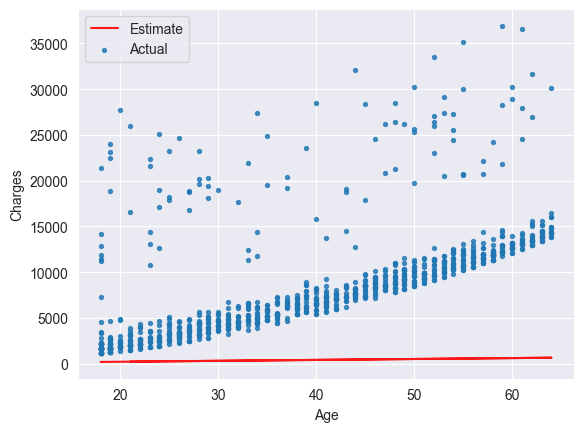

In [93]:
try_parameters(non_smoker_df, 10, 20)

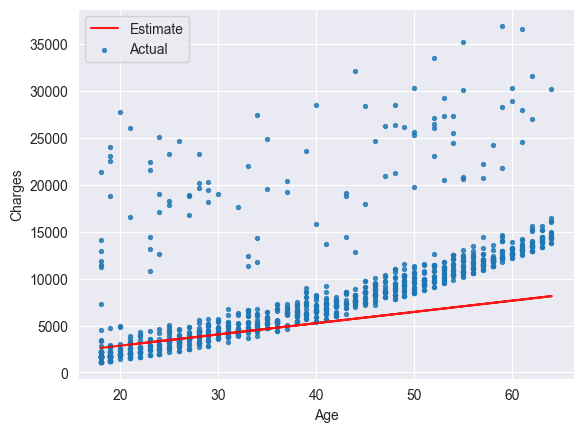

In [73]:
try_parameters(non_smoker_df, 120, 450)

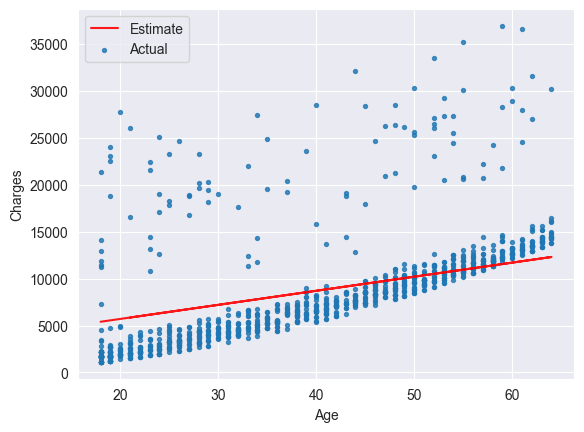

In [133]:
try_parameters(non_smoker_df, 150, 2700)

Як ми бачимо, параметр w змінює кут нахилу нашої лінії, а b - зміщення нашої лінії по осі y (charges)

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [113]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

targets = non_smoker_df['charges']

medical_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [114]:
predicted1 = estimate_charges(non_smoker_df.age, 10, 20)
rmse1 = rmse(targets, predicted1)
rmse1

9958.884845019938

In [115]:
predicted2 = estimate_charges(non_smoker_df.age, 120, 450)
rmse2 = rmse(targets, predicted2)
rmse2

6053.938508205315

In [132]:
predicted3 = estimate_charges(non_smoker_df.age, 150, 2700)
rmse3 = rmse(targets, predicted3)
rmse3

4949.05903842752

Найнижче значення втрат, яке я зміг досягти - 4949, що є третиною від середнього значення для виплат.
Для того,щоб досягти цього значення, я спочатку підібрав значення b, а потім почав підбирати значення w.